In [1]:
%pip install torch 

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import yfinance as yf


In [2]:
# data = yf.download(tickers = "AMZN", start = "2012-03-11", end = "2024-03-11")
# data = data.dropna()
# data

data = pd.read_csv('/home/josh/Dev/tyit_sem5/dmdw/dwdm_project/data/stocks/AMZN.csv')
data = data.dropna()
data



,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
...,...,...,...,...,...,...,...
5753,2020-03-26,1902.000000,1956.489990,1889.290039,1955.489990,1955.489990,6221300
5754,2020-03-27,1930.859985,1939.790039,1899.920044,1900.099976,1900.099976,5387900
5755,2020-03-30,1922.829956,1973.630005,1912.339966,1963.949951,1963.949951,6126100
5756,2020-03-31,1964.349976,1993.020020,1944.010010,1949.719971,1949.719971,5123600


In [3]:
#swap to gpu
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cuda:0'

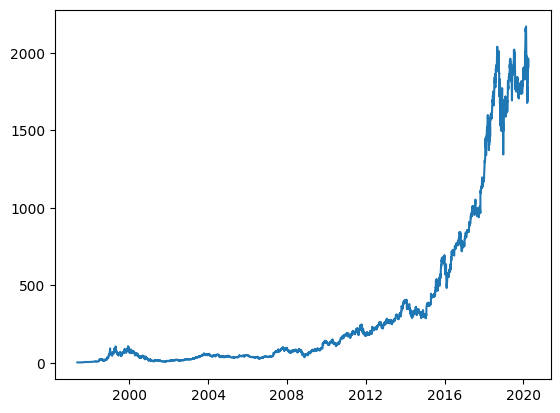

In [4]:
data['Date'] = pd.to_datetime(data['Date'])
plt.plot(data['Date'], data['Close'])

In [13]:
from copy import deepcopy as dc

def prepare_dataframe_for_lstm(df, n_steps):
    df = dc(df)
    df['Date'] = pd.to_datetime(df['Date'])

    df.set_index('Date', inplace = True)
    for i in range(1, n_steps+1):
        df[f'Close(t-{i})'] = df['Close'].shift(i)

    df.dropna(inplace = True)
    return df

lookback = 7
shifted_df = prepare_dataframe_for_lstm(data, lookback)
shifted_df

,Open,High,Low,Close,Adj Close,Volume,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7)
Date,,,,,,,,,,,,,
1997-05-27,1.510417,1.645833,1.458333,1.583333,1.583333,8697600,1.500000,1.395833,1.427083,1.635417,1.708333,1.729167,1.958333
1997-05-28,1.625000,1.635417,1.531250,1.531250,1.531250,4574400,1.583333,1.500000,1.395833,1.427083,1.635417,1.708333,1.729167
1997-05-29,1.541667,1.541667,1.479167,1.505208,1.505208,3472800,1.531250,1.583333,1.500000,1.395833,1.427083,1.635417,1.708333
1997-05-30,1.500000,1.510417,1.479167,1.500000,1.500000,2594400,1.505208,1.531250,1.583333,1.500000,1.395833,1.427083,1.635417
1997-06-02,1.510417,1.531250,1.500000,1.510417,1.510417,591600,1.500000,1.505208,1.531250,1.583333,1.500000,1.395833,1.427083
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-26,1902.000000,1956.489990,1889.290039,1955.489990,1955.489990,6221300,1885.839966,1940.099976,1902.829956,1846.089966,1880.930054,1830.000000,1807.839966
2020-03-27,1930.859985,1939.790039,1899.920044,1900.099976,1900.099976,5387900,1955.489990,1885.839966,1940.099976,1902.829956,1846.089966,1880.930054,1830.000000
2020-03-30,1922.829956,1973.630005,1912.339966,1963.949951,1963.949951,6126100,1900.099976,1955.489990,1885.839966,1940.099976,1902.829956,1846.089966,1880.930054
